# Fashion MNIST Neural Network Analysis

This notebook implements an neural network for Fashion MNIST classification using TensorFlow/Keras. The model is designed to achieve ~90% accuracy by addressing common issues like the dying ReLU problem.

## Key Optimizations:
- **LeakyReLU activation** to prevent dying neurons
- **Larger hidden layer** (256 neurons) for increased capacity
- **Learning Rate Scheduling**

## Import Libraries and Setup

In [15]:
# TensorFlow and tf.keras, more info at: https://www.tensorflow.org/guide/keras
import tensorflow as tf
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for Jupyter notebook display
%matplotlib inline
plt.style.use('default')


## Load and Explore the Fashion MNIST Dataset

Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [16]:
# imports the dataset (it actually downloads it)
fashion_mnist = keras.datasets.fashion_mnist

# sets up the train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# debug: prints info about the shape and the size of the sets
print('Shape of the training images', train_images.shape)
print('Number of training labels: ', len(train_labels))
print('Shape of the test images', test_images.shape)
print('Number of test labels: ', len(test_labels))

Shape of the training images (60000, 28, 28)
Number of training labels:  60000
Shape of the test images (10000, 28, 28)
Number of test labels:  10000


## Visualize Raw Dataset Samples

Let's look at the first 25 images from the dataset to understand what we're working with.

Saved plot: fashion_mnist_samples_raw.png


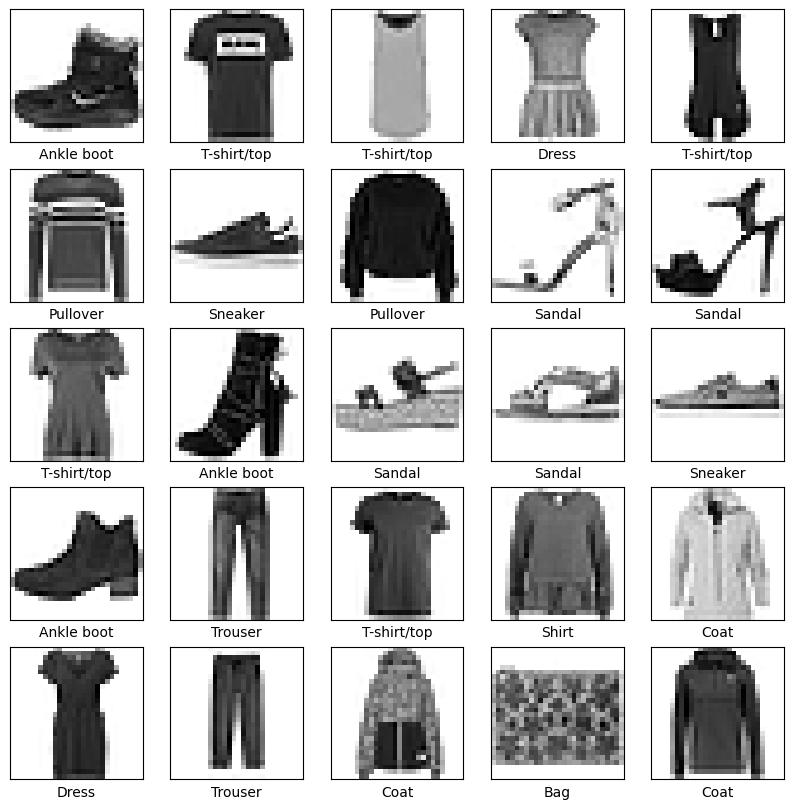

In [17]:
# displays the first 25 imagens of the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="binary")
    plt.xlabel(class_names[train_labels[i]])
plt.savefig('fashion_mnist_samples_raw.png', dpi=150, bbox_inches='tight')
print("Saved plot: fashion_mnist_samples_raw.png")

## Data Preprocessing - Normalization

Neural networks perform better when input features are scaled to a similar range. We'll normalize pixel values from [0, 255] to [0, 1].

Shape of the training images: (60000, 28, 28)
Number of training labels:  60000
Saved plot: fashion_mnist_samples_normalized.png


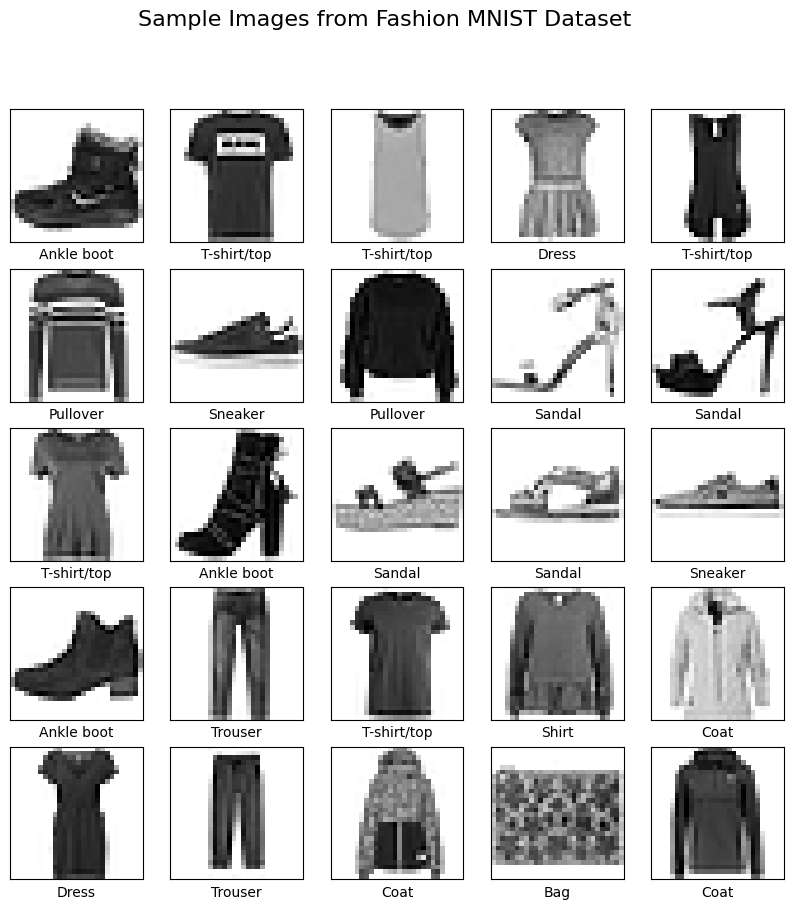

In [18]:
# values between 0 to 255 are changed to 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print('Shape of the training images:', train_images.shape)
print('Number of training labels: ', len(train_labels))

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Images from Fashion MNIST Dataset", fontsize=16)
plt.savefig('fashion_mnist_samples_normalized.png', dpi=150, bbox_inches='tight')
print("Saved plot: fashion_mnist_samples_normalized.png")

## Define Model Parameters

hidden_layer_size: is the number of neurons in the hidden layer.
activation_function: is the activation function to use in the hidden layer.
leaky_relu_negative_slope: is the slope for the negative part of the LeakyReLU activation function.
kernel_initializer: is the weight initializer for the convolutional layers.
training_optimizer: is the optimizer to use for training the model.
learning_rate: is the initial learning rate for the optimizer.
number_of_epochs: is the number of times to iterate over the training dataset.
dropout_rate: is the dropout rate is the fraction of the input units to drop during training to prevent overfitting.
batch_size: is the number of samples per gradient update.

leaky_relu_negative_slope is a hyperparameter that controls the slope of the negative part of the LeakyReLU activation function. A value of 0.1 means that for negative inputs, the output will be 10% of the input, which helps prevent dying neurons by allowing a small gradient to flow even when the input is negative.

see https://keras.io/api/layers/ for more details

In [19]:

hidden_layer_size = 256
activation_function = 'leaky_relu'
leaky_relu_negative_slope = 0.1
kernel_initializer='he_normal'  # he_normal for better initialization
training_optimizer = 'adam'
learning_rate = 0.001
number_of_epochs = 150
dropout_rate = 0.3  # Increased dropout to prevent overfitting with larger network
batch_size = 64

print(f"Model Configuration:")
print(f"- Hidden layer size: {hidden_layer_size}")
print(f"- Activation: {activation_function} (slope: {leaky_relu_negative_slope})")
print(f"- Dropout rate: {dropout_rate}")
print(f"- Batch size: {batch_size}")
print(f"- Max epochs: {number_of_epochs}")

Model Configuration:
- Hidden layer size: 256
- Activation: leaky_relu (slope: 0.1)
- Dropout rate: 0.3
- Batch size: 64
- Max epochs: 150


## Build the Neural Network Model

Sequential model with:
- Input layer (28x28 images)
- Flatten layer to convert 2D images to 1D
- Dense hidden layer with 256 neurons
- LeakyReLU activation to prevent dying neurons
- Dropout for regularization
- Output layer with 10 neurons (one per class)

In [20]:
# creating the IMPROVED ANN
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28), name="input_layer"),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden_layer_size, kernel_initializer=kernel_initializer, name="hidden_layer"), # larger fully connected layer
    keras.layers.LeakyReLU(negative_slope=leaky_relu_negative_slope, name="leaky_relu_activation"),  # Fixed parameter name
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, name="output_layer") # output layer
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_relu_activation           │ (None, 256)            │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

I'll use Adam optimizer with sparse categorical crossentropy loss since our labels are integers (not one-hot encoded).

In [21]:
model.compile(optimizer=training_optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Model compiled successfully!")

Model compiled successfully!


## Set Up Training Callbacks

Some training techniques to improve performance:
- **Early Stopping**: Stop training when validation accuracy stops improving
- **Learning Rate Scheduling**: Reduce learning rate when validation accuracy plateaus

In [22]:
# Training with learning rate scheduling and early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=30, # The number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1
)

# Add learning rate reduction on plateau
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5, # Reduce learning rate by a factor
    patience=5, # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6, # Minimum learning rate
    verbose=1
)

print("Training callbacks configured:")
print("- Early stopping with patience=30")
print("- Learning rate reduction on plateau")

Training callbacks configured:
- Early stopping with patience=30
- Learning rate reduction on plateau


## Train the Model

This is where the magic happens! The model will learn to classify fashion items.

In [23]:
history = model.fit(train_images, train_labels, 
          epochs=number_of_epochs, 
          batch_size=batch_size,  # Optimized batch size
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping, lr_scheduler])

print("Training completed!")

Epoch 1/150


2025-07-01 10:58:16.870770: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7533 - loss: 0.6940 - val_accuracy: 0.8415 - val_loss: 0.4379 - learning_rate: 0.0010
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8498 - loss: 0.4184 - val_accuracy: 0.8569 - val_loss: 0.3962 - learning_rate: 0.0010
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8629 - loss: 0.3739 - val_accuracy: 0.8690 - val_loss: 0.3699 - learning_rate: 0.0010
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8684 - loss: 0.3575 - val_accuracy: 0.8711 - val_loss: 0.3669 - learning_rate: 0.0010
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8744 - loss: 0.3455 - val_accuracy: 0.8694 - val_loss: 0.3694 - learning_rate: 0.0010
Epoch 6/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8779 - loss: 0.3297 - val_accuracy: 0.8679 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 7/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8817 - loss: 0.3177 - val_a

## Visualize Training History

Let's plot the training and validation accuracy/loss over epochs to understand how well our model learned.

Saved plot: training_history.png


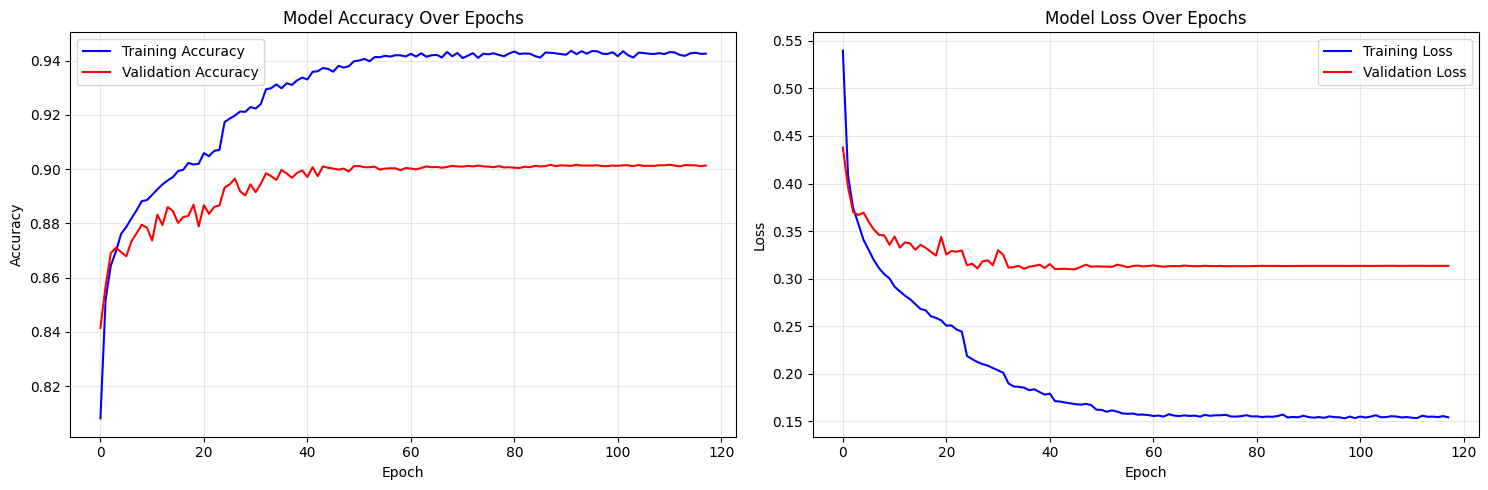

In [24]:
# Create training history plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('Model Accuracy Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Model Loss Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
print("Saved plot: training_history.png")

## Analyze Hidden Layer Activations

One of the key improvements in this model is using LeakyReLU to prevent the "dying neuron" problem. Let's analyze the activation patterns.

In [25]:
print("\n--- Analyzing Hidden Layer Activations ---")

hidden_layer_output = model.get_layer(name='leaky_relu_activation').output
model_input = model.layers[0].input

# Get activations for a subset of the training data for efficiency
activation_model = keras.Model(inputs=model_input, outputs=hidden_layer_output)

activations = activation_model.predict(train_images[:1000])

# Calculate the percentage of zero-valued activations for relu usage
percent_zeros = np.mean(activations == 0) * 100
percent_negative = np.mean(activations < 0) * 100
print(f"{percent_zeros:.2f}% of hidden layer activations are exactly zero (for this sample).")
print(f"{percent_negative:.2f}% of hidden layer activations are negative (showing LeakyReLU working).")


--- Analyzing Hidden Layer Activations ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.00% of hidden layer activations are exactly zero (for this sample).
75.02% of hidden layer activations are negative (showing LeakyReLU working).


## Visualize Activation Distribution

Saved plot: activation_distribution.png


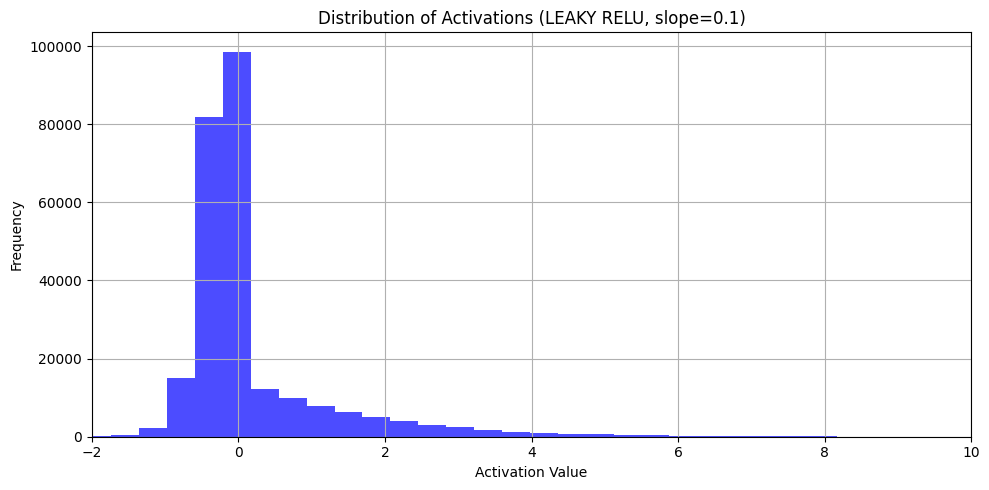

In [26]:
# Plot histogram of activations
flat_activations = activations.flatten()
plt.figure(figsize=(10, 5))
plt.hist(flat_activations, bins=50, color='blue', alpha=0.7)
plt.title(f"Distribution of Activations (LEAKY RELU, slope={leaky_relu_negative_slope})")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.xlim(-2, 10)
plt.grid(True)
plt.tight_layout()
plt.savefig('activation_distribution.png', dpi=150, bbox_inches='tight')
print("Saved plot: activation_distribution.png")

## Evaluate Model Performance

In [27]:
print("\nExecution ended.")

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

print("execution ended")


Execution ended.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.3225

Test accuracy: 0.9016000032424927
execution ended


## Advanced Analysis - Dying Neuron Detection

Let's check if our LeakyReLU successfully prevented the dying neuron problem.

In [28]:
print("\n--- Checking for Dying Neurons ---")

all_train_activations = activation_model.predict(train_images, batch_size=256)

# For LeakyReLU, check neurons that have very low maximum activation (close to zero)
max_activations_per_neuron = np.max(all_train_activations, axis=0)
min_activations_per_neuron = np.min(all_train_activations, axis=0)

dying_threshold = 1e-4  # More lenient threshold for LeakyReLU with higher negative slope
dying_neurons = np.sum(max_activations_per_neuron < dying_threshold)
total_neurons = hidden_layer_size

print(f"Neurons with max activation < {dying_threshold}: {dying_neurons} out of {total_neurons}")
print(f"Percentage of dying neurons: {(dying_neurons / total_neurons) * 100:.2f}%")

# Additional analysis for LeakyReLU
mean_activations = np.mean(all_train_activations, axis=0)
std_activations = np.std(all_train_activations, axis=0)

print(f"\nActivation Statistics:")
print(f"Mean activation range: [{np.min(mean_activations):.4f}, {np.max(mean_activations):.4f}]")
print(f"Std activation range: [{np.min(std_activations):.4f}, {np.max(std_activations):.4f}]")
print(f"Neurons with negative mean activation: {np.sum(mean_activations < 0)}")


--- Checking for Dying Neurons ---
121/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-07-01 11:04:16.595318: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neurons with max activation < 0.0001: 0 out of 256
Percentage of dying neurons: 0.00%

Activation Statistics:
Mean activation range: [-0.5342, 1.6441]
Std activation range: [0.3558, 3.1667]
Neurons with negative mean activation: 68


## Per-Category Accuracy Analysis

Let's analyze how well our model performs on each fashion category.

In [29]:
if dying_neurons > 0:
    print(f"\nWarning: {dying_neurons} neurons might be dying (very low activation).")
else:
    print("\nGood: No dying neurons detected with LeakyReLU!")
    print("LeakyReLU successfully prevents the dying neuron problem.")
    
    # Get the model predictions for the test set
    probability_model = keras.Sequential([model, keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Calculate accuracy and simple confidence interval for each class
    class_accuracies = {}
    for i in range(len(class_names)):
        class_indices = np.where(test_labels == i)[0]
        total_samples = len(class_indices)
        if total_samples > 0:
            correct_predictions = np.sum(predicted_labels[class_indices] == test_labels[class_indices])
            accuracy = correct_predictions / total_samples
            class_accuracies[class_names[i]] = accuracy
            
            # Calculate standard error for confidence interval
            std_error = np.sqrt(accuracy * (1 - accuracy) / total_samples)
            print(f"{class_names[i]}: {accuracy:.3f} ± {1.96 * std_error:.3f}")
        else:
            class_accuracies[class_names[i]] = 0
            print(f"{class_names[i]}: No samples")


Good: No dying neurons detected with LeakyReLU!
LeakyReLU successfully prevents the dying neuron problem.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
T-shirt/top: 0.862 ± 0.021
Trouser: 0.981 ± 0.008
Pullover: 0.825 ± 0.024
Dress: 0.909 ± 0.018
Coat: 0.852 ± 0.022
Sandal: 0.969 ± 0.011
Shirt: 0.718 ± 0.028
Sneaker: 0.968 ± 0.011
Bag: 0.974 ± 0.010
Ankle boot: 0.958 ± 0.012


## Visualize Per-Category Performance


--- Per-Class Accuracy Analysis ---
Saved plot: per_category_accuracy.png


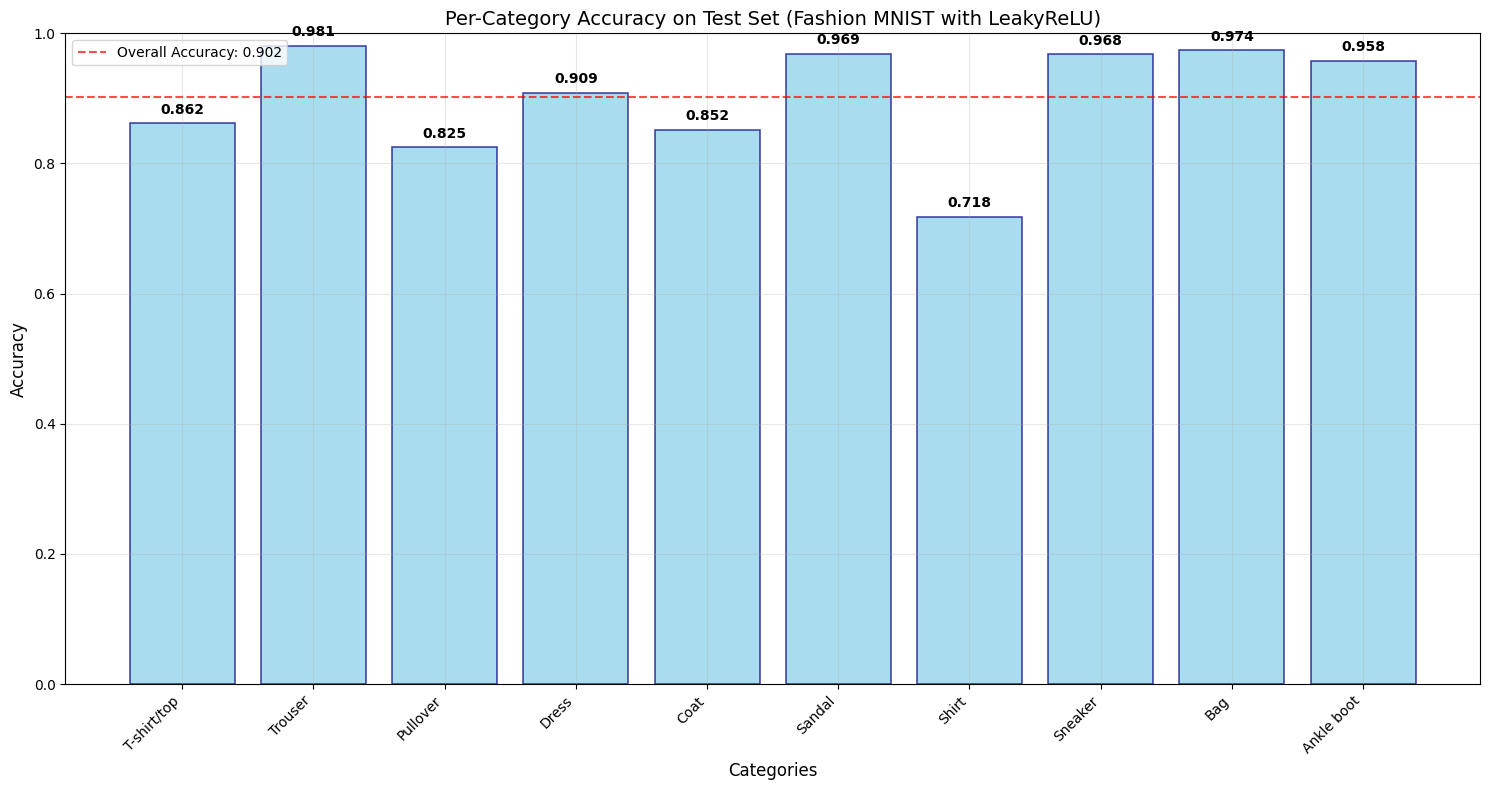

In [30]:
# Enhanced bar plot of accuracies
labels = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

print("\n--- Per-Class Accuracy Analysis ---")

plt.figure(figsize=(15, 8))
bars = plt.bar(labels, accuracies, color='skyblue', alpha=0.7, edgecolor='navy', linewidth=1.2)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Category Accuracy on Test Set (Fashion MNIST with LeakyReLU)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Add overall accuracy line
overall_acc = float(np.mean(accuracies))
plt.axhline(y=overall_acc, color='red', linestyle='--', alpha=0.7, 
            label=f'Overall Accuracy: {overall_acc:.3f}')
plt.legend()

plt.tight_layout()
plt.savefig('per_category_accuracy.png', dpi=150, bbox_inches='tight')
print("Saved plot: per_category_accuracy.png")

## Summary Statistics

In [31]:
# Summary statistics
print(f"\n--- Summary Statistics ---")
print(f"Best performing category: {labels[np.argmax(accuracies)]} ({max(accuracies):.3f})")
print(f"Worst performing category: {labels[np.argmin(accuracies)]} ({min(accuracies):.3f})")
print(f"Standard deviation of accuracies: {np.std(accuracies):.3f}")
print(f"Range of accuracies: {max(accuracies) - min(accuracies):.3f}")


--- Summary Statistics ---
Best performing category: Trouser (0.981)
Worst performing category: Shirt (0.718)
Standard deviation of accuracies: 0.082
Range of accuracies: 0.263
